In [94]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [95]:
# Model class inherits nn.Module
class Model(nn.Module):
    # Input Layer (4 features) -->
    # Hidden Layer1 (number of neurons) -->
    # Hidden Layer2(number of neurons) -->
    # Output (3 classes)

    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() # instantiate our nn.Module
        self.fully_connected_1 = nn.Linear(in_features, h1)
        self.fully_connected_2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fully_connected_1(x))
        x = F.relu(self.fully_connected_2(x))
        x = self.out(x)

        return x

In [96]:
# Seta a manual seed for rendomization
torch.manual_seed(42)

model = Model()

In [97]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [98]:
url = 'Iris.csv'
df = pd.read_csv(url)

In [99]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [100]:
df['Species'] = df['Species'].replace('Iris-setosa', 0)
df['Species'] = df['Species'].replace('Iris-versicolor', 1)
df['Species'] = df['Species'].replace('Iris-virginica', 2)

C:\Users\shahs_snohmej\AppData\Local\Temp\ipykernel_9456\3221048369.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species'] = df['Species'].replace('Iris-virginica', 2)


In [101]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [102]:
df = df.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [103]:
X = df.drop('Species', axis=1)
y = df['Species']

In [104]:
# Convert these to numpy arrays
X = X.values 
y = y.values

In [105]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [106]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Convert X features(numpy arrays) to PyTorch Float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [110]:
# Convert y labels(numpy array) to PyTorch Long tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [111]:
# Set the criterion of model to measure the error, here we use CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Choose Adam optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate (it will take more time to train))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [112]:
model.parameters

<bound method Module.parameters of Model(
  (fully_connected_1): Linear(in_features=4, out_features=8, bias=True)
  (fully_connected_2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [113]:
# Train the model
# epochs = number of times we go through the training set
epochs = 100
losses = []
for i in range(epochs):
    # Go forward and get a prediction
    y_predict = model.forward(X_train) # Get predicted results

    # Calculate the loss/error
    loss = criterion(y_predict, y_train) # Compare predicted results with actual results

    # Keep track of the losses 
                # Tensor to numpy array conversion
    losses.append(loss.detach().numpy())

    # Print the loss every 10 epochs
    if i%10 == 0:
        print(f"Epoch: {i} and loss: {loss}")

    # Do some back propagation: take the error rate of forward propagation 
    # and feed it back propagate it through the network to fine tune the weights

    optimizer.zero_grad() # Zero out the gradients
    loss.backward() # Back propagation
    optimizer.step() # Update the weights


Epoch: 0 and loss: 1.0846847295761108
Epoch: 10 and loss: 0.9183797240257263
Epoch: 20 and loss: 0.7622429728507996
Epoch: 30 and loss: 0.6273833513259888
Epoch: 40 and loss: 0.4667471945285797
Epoch: 50 and loss: 0.2877059876918793
Epoch: 60 and loss: 0.1673891246318817
Epoch: 70 and loss: 0.10598885267972946
Epoch: 80 and loss: 0.08021347224712372
Epoch: 90 and loss: 0.06947016716003418


Text(0, 0.5, 'Loss/Error')

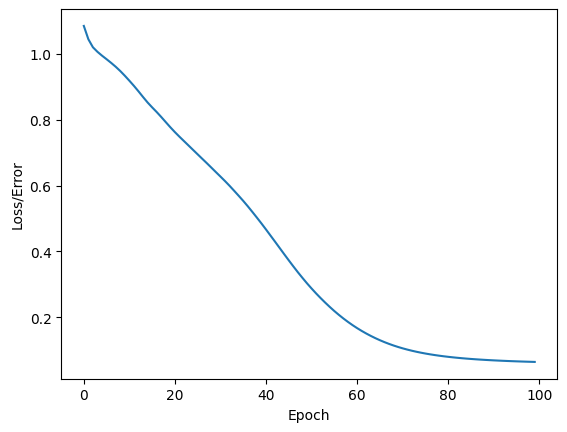

In [114]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss/Error')

In [115]:
# Evaluate the model on the test data
with torch.no_grad(): # Turn off backpropagation
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)

In [116]:
loss

tensor(0.0634)

In [127]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        # Print the predicted value and the actual value
        print(f'{i+1}.) {str(y_val)} {y_test[i]}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1

            print("\033[32mCorrect prediction!\033[0m")
        else:
            print("\033[31mIncorrect prediction (-_-)\033[0m")

print(f'We got {correct} correct!')

1.) tensor([-1.4120,  6.3132,  2.6088]) 1
Correct prediction!
2.) tensor([ 8.4023,  2.4573, -7.5391]) 0
Correct prediction!
3.) tensor([-12.1991,   1.1829,  13.7443]) 2
Correct prediction!
4.) tensor([-1.6752,  5.9271,  2.8622]) 1
Correct prediction!
5.) tensor([-1.5887,  6.7559,  2.8371]) 1
Correct prediction!
6.) tensor([ 7.8451,  2.3289, -7.0010]) 0
Correct prediction!
7.) tensor([ 1.1273,  6.0707, -0.0493]) 1
Correct prediction!
8.) tensor([-5.2088,  4.4484,  6.5316]) 2
Correct prediction!
9.) tensor([-3.2614,  4.9128,  4.4788]) 1
Correct prediction!
10.) tensor([0.5683, 6.5565, 0.5445]) 1
Correct prediction!
11.) tensor([-4.3492,  4.7780,  5.6344]) 2
Correct prediction!
12.) tensor([ 7.3631,  2.0552, -6.5497]) 0
Correct prediction!
13.) tensor([ 8.1384,  2.3552, -7.2879]) 0
Correct prediction!
14.) tensor([ 7.4936,  2.1057, -6.6740]) 0
Correct prediction!
15.) tensor([ 7.8643,  2.2491, -7.0269]) 0
Correct prediction!
16.) tensor([-1.3322,  6.5325,  2.5448]) 1
Correct prediction!
1

In [134]:
# Evaluate NEW Data On The Network
new_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

In [129]:
with torch.no_grad():
    print(model(new_iris))
    print(model(new_iris).argmax().item())

tensor([ 6.7717,  3.2499, -5.8619])
0


In [132]:
new_iris2 = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [133]:
with torch.no_grad():
    print(model(new_iris2))
    print(model(new_iris2).argmax().item())

tensor([-4.9424,  3.9152,  6.1960])
2


In [135]:
# Save the model
torch.save(model.state_dict(), 'my_iris_model.pt')

In [136]:
# Load the model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

C:\Users\shahs_snohmej\AppData\Local\Temp\ipykernel_9456\1498051521.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_iris_model.p

<All keys matched successfully>

In [139]:
# Evaluate the new model (Make sure it loads correctly)
new_model.eval() 

Model(
  (fully_connected_1): Linear(in_features=4, out_features=8, bias=True)
  (fully_connected_2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [140]:
with torch.no_grad():
    print(new_model(new_iris))
    print(new_model(new_iris).argmax().item())

tensor([ 6.7717,  3.2499, -5.8619])
0
